## <center>Project 2: Big Network Data Analysis </center>
### Import the required libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite as bi

### Read the data from the link: 
https://assets.datacamp.com/production/repositories/907/datasets/96aae928f1611cf3fef4d876040ffdbd1eb9d4f3/american-revolution.csv

In [2]:
df = pd.read_csv("https://assets.datacamp.com/production/repositories/907/datasets/96aae928f1611cf3fef4d876040ffdbd1eb9d4f3/american-revolution.csv", index_col=0)
df.head()

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
Adams.John,0,0,1,1,0,0,0
Adams.Samuel,0,0,1,1,0,1,1
Allen.Dr,0,0,1,0,0,0,0
Appleton.Nathaniel,0,0,1,0,0,1,0
Ash.Gilbert,1,0,0,0,0,0,0


### Create a netwok graph using the networkx library

In [3]:
G = nx.Graph()
G.add_nodes_from(df.index, bipartite=0)
G.add_nodes_from(df.columns, bipartite=1)
for x in df.index:
    for y in df.columns:
        if df.loc[x, y] == 1:
            G.add_edge(x, y)

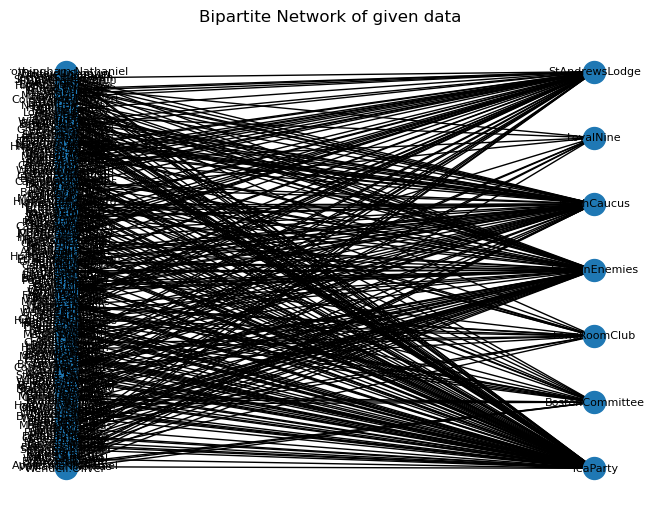

In [4]:
pos = nx.bipartite_layout(G, df.index)
nx.draw(G, pos, with_labels=True, node_size=250, font_size=8)
plt.title("Bipartite Network of given data")
plt.show()

### Define the function trim_edges() and  island_method()

In [5]:
def trim_edges(g, weight=1): 
  g2=nx.Graph()
  for f, to, edata in g.edges(data=True): 
    if edata['weight'] > weight:
      g2.add_edge(f,to,weight = edata['weight'])
  return g2

def island_method(g): 
  weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
  mn=int(min(weights)) 
  mx=int(max(weights)) #compute the size of the step, so we get a reasonable step in iterations 
  #print(f"Min : {mn}, Max : {mx}")
  iterations = 5
  step=int((mx-mn)/iterations)
  if step == 0:
    step = mn
    iterations = mx

  #print(f"Step : {step}")
  return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx+1,step)]

### Create a weighted network graph 

In [6]:
w_net = bi.weighted_projected_graph(G, df.index, ratio=False)

### Using the island_method get the most valueble subnetworks

In [7]:
sub_graphs = island_method(w_net)

### Check the size subgraphs and minimum and maximum degree of freedom 

In [8]:
n= len(sub_graphs)
print(f"Number of subgraphs obtained by island_method is {n}" )

Number of subgraphs obtained by island_method is 4


In [9]:
g1 = sub_graphs[0][1]

In [10]:
nodes = []
for u, v in g1.edges:
    if u not in nodes:
        nodes.append(u)
weights=[edata['weight'] for f,t,edata in g1.edges(data=True)] 

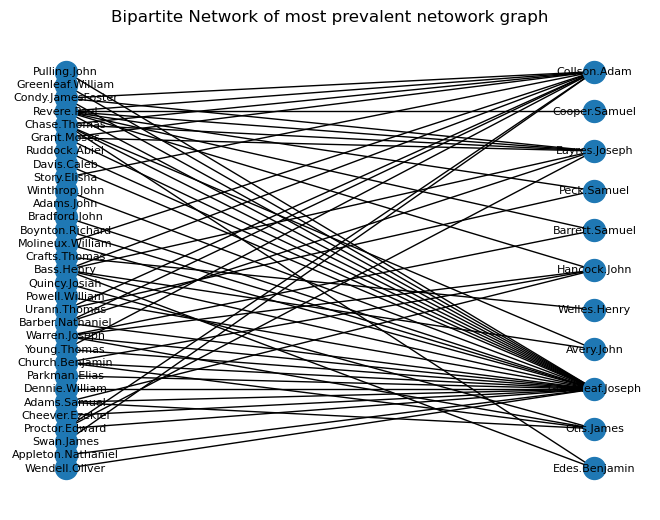

In [11]:
pos = nx.bipartite_layout(g1, nodes)
nx.draw(g1, pos, with_labels=True, node_size=250, font_size=8)
plt.title("Bipartite Network of most prevalent netowork graph")
plt.show()

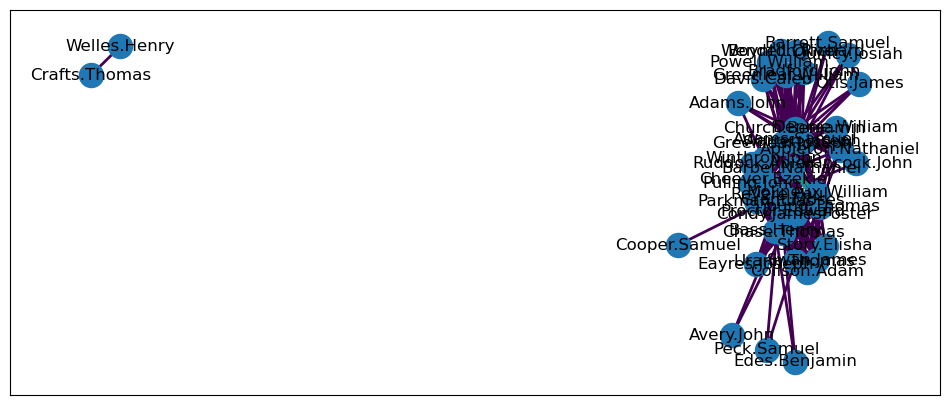

In [12]:
plt.figure(figsize=[12, 5])
nx.draw_networkx(g1,width=weights, edge_color=weights)

## Let's draw the histogram of the centrality of the g1

(array([33.,  1.,  1.,  0.,  2.,  0.,  3.,  0.,  1.,  1.]),
 array([0.        , 0.01270205, 0.0254041 , 0.03810615, 0.0508082 ,
        0.06351025, 0.07621231, 0.08891436, 0.10161641, 0.11431846,
        0.12702051]),
 <BarContainer object of 10 artists>)

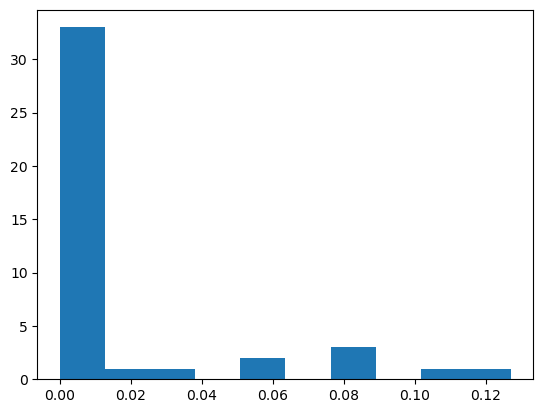

In [13]:
centrality = nx.betweenness_centrality(g1)
plt.hist(centrality.values())

In [14]:
value = max(centrality.values())
most_networked = list(centrality.keys())[list(centrality.values()).index(value)]
print(f"{most_networked}: {value}")

Revere.Paul: 0.12702050997782705


In [15]:
most_networked = list(centrality.keys())[list(centrality.values()).index(value)]

In [16]:
five_most_centrality = sorted(centrality.values(), reverse = True)[0:5]
celebs = []
for i in range(len(five_most_centrality)):
    value = five_most_centrality[i]
    name = list(centrality.keys())[list(centrality.values()).index(value)]
    celebs.append(name)
celebs

['Revere.Paul',
 'Warren.Joseph',
 'Barber.Nathaniel',
 'Adams.Samuel',
 'Adams.Samuel']

<BarContainer object of 5 artists>

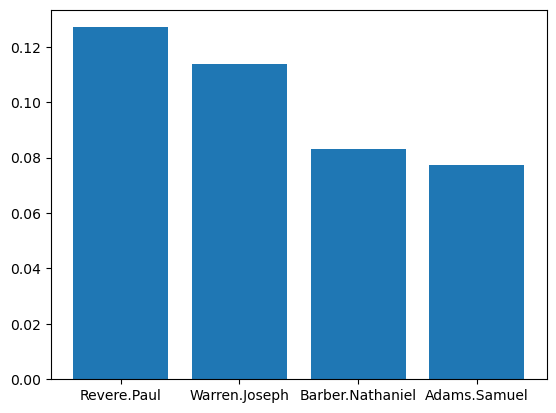

In [17]:
plt.bar(x=celebs, height=five_most_centrality)

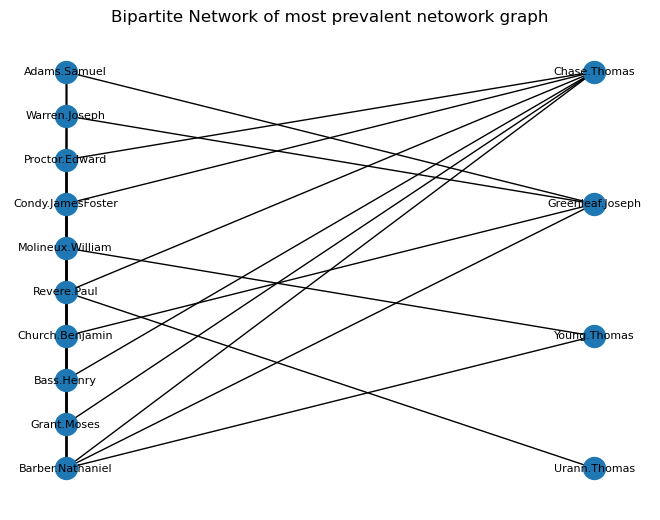

In [18]:
g2 = sub_graphs[1][1]
nodes = []
for u, v in g2.edges:
    if u not in nodes:
        nodes.append(u)
weights=[edata['weight'] for f,t,edata in g2.edges(data=True)] 
pos = nx.bipartite_layout(g2, nodes)
nx.draw(g2, pos, with_labels=True, node_size=250, font_size=8)
plt.title("Bipartite Network of most prevalent netowork graph")
plt.show()

It can be seen that the netowrk graph of the large network dataset has been successfully processed and we have found the most important subnetworks using the island method. 